# **1. Nhập và xử lý dữ liệu**

In [165]:
# Cài đặt các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [166]:
## Nhập dữ liệu

# Cài thư viện để đọc dữ liệu từ uci
from ucimlrepo import fetch_ucirepo

#  Đọc & tạo df có id=352 (Thông tin từ dataset)
df_online_retail = fetch_ucirepo(id=352).data.original

# Kiểm tra dữ liệu
df_online_retail.shape
df_online_retail.info()
df_online_retail.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [167]:
# Chuyển kiểu dữ liệu của InvoiceDate về datetime
df_online_retail['InvoiceDate'] = pd.to_datetime(df_online_retail['InvoiceDate'], errors='coerce')
df_online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [168]:
# Tạo bảng dữ liệu df từ 7/2011 đến 11/2011 từ bảng dữ liệu df_online_retail
df = df_online_retail[(df_online_retail['InvoiceDate'] >= '2011-07-01') & (df_online_retail['InvoiceDate'] <= '2011-11-30')]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
245903,558638,84836,ZINC METAL HEART DECORATION,12,2011-07-01 08:16:00,1.25,16317.0,United Kingdom
245904,558638,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-07-01 08:16:00,0.85,16317.0,United Kingdom
245905,558638,22784,LANTERN CREAM GAZEBO,3,2011-07-01 08:16:00,4.95,16317.0,United Kingdom
245906,558638,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-07-01 08:16:00,0.95,16317.0,United Kingdom
245907,558638,22674,FRENCH TOILET SIGN BLUE METAL,12,2011-07-01 08:16:00,1.25,16317.0,United Kingdom


In [169]:
df.shape

(267027, 8)

In [170]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,267027.000000,267027,267027.000000,210084.000000
mean,9.854689,2011-09-28 18:49:28.582278400,4.105782,15293.688329
min,-4830.000000,2011-07-01 08:16:00,-11062.060000,12347.000000
25%,1.000000,2011-08-24 16:18:00,1.250000,13994.000000
50%,4.000000,2011-10-05 15:17:00,2.080000,15159.000000
75%,12.000000,2011-11-07 13:45:00,4.130000,16764.000000
max,12540.000000,2011-11-29 18:19:00,11062.060000,18287.000000
std,49.800445,NaN,65.047725,1704.235662


In [171]:
#Kiểm tra dữ liệu bị thiếu
df.isnull().sum().sort_values(ascending=False)

CustomerID     56943
Description      511
StockCode          0
InvoiceNo          0
Quantity           0
InvoiceDate        0
UnitPrice          0
Country            0
dtype: int64

Nhóm nhận thấy một số bản ghi thiếu thông tin ở các trường quan trọng như CustomerID và Description. Cụ thể:

- CustomerID là định danh duy nhất cho mỗi khách hàng, đóng vai trò cốt lõi trong việc phân tích hành vi tiêu dùng, tần suất mua hàng,… Việc thiếu mã khách hàng khiến những bản ghi này không thể gắn kết với bất kỳ cá nhân cụ thể nào, dẫn đến thiếu tính liên kết trong phân tích.

- Description cung cấp thông tin mô tả sản phẩm, là yếu tố quan trọng để phân loại, thống kê và đánh giá danh mục sản phẩm. Việc thiếu mô tả làm giảm khả năng hiểu rõ nội dung giao dịch.

Vì vậy, để đảm bảo độ tin cậy cho quá trình phân tích dữ liệu, chúng em quyết định điền vào các bản ghi bị thiếu CustomerID hoặc Description. Cách làm cụ thể ở phía dưới

In [172]:
#Kiểm tra xem 1 InvoiceNo có bao nhiêu CustomerID
InvoiceNo_Cus_counts = df.groupby('InvoiceNo')['CustomerID'].nunique().reset_index().sort_values(by='CustomerID', ascending=False)

print(InvoiceNo_Cus_counts)

      InvoiceNo  CustomerID
11925   C579521           1
0        558638           1
1        558639           1
2        558640           1
3        558641           1
...         ...         ...
10150    579272           0
10153    579275           0
10119    579187           0
9984     578930           0
9993     578940           0

[11926 rows x 2 columns]


Ta nhận thấy 1 InvoiceNo ứng với 1 CustomerID. Đối với những CustomerID bị missing thì InvoiceNo cũng là duy nhất. Nên ta không thể điền vào các CustomerID bị thiếu. Do đó, nhóm quyết định bỏ các giá trị NaN

In [173]:
#Kiểm tra xem 1 StockCode có bao nhiêu description (Tên sản phẩm)
Stockcode_Des_counts = df.groupby('StockCode')['Description'].nunique().reset_index() .sort_values(by='Description', ascending=False).rename(columns={'Description': 'Distinct Descriptions'})

print(Stockcode_Des_counts)

     StockCode  Distinct Descriptions
139      20713                      8
1788     23084                      7
1831     23131                      5
725      21830                      5
2030     23343                      5
...        ...                    ...
132      20701                      0
140      20716                      0
89      18097A                      0
3433    90210C                      0
2       10123C                      0

[3486 rows x 2 columns]


In [174]:
# Chọn 1 Stockcode để nghiên cứu
stockcode_counts = df.groupby(['StockCode', 'Description'])['Description'].count().reset_index(name='count')
result = stockcode_counts[stockcode_counts['StockCode'] == '20713']
result

,StockCode,Description,count
153,20713,Found,1
154,20713,JUMBO BAG OWLS,346
155,20713,Marked as 23343,1
156,20713,found,1
157,20713,wrongly coded 23343,1
158,20713,wrongly coded-23343,1
159,20713,wrongly marked 23343,1
160,20713,wrongly marked. 23343 in box,1


In [175]:
# Xem Description bị thiếu
missing_desc_df = df[df['Description'].isna()]
missing_desc_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
246042,558663,23574,NaN,100,2011-07-01 10:44:00,0.0,NaN,United Kingdom
246773,558724,35966,NaN,14,2011-07-01 14:30:00,0.0,NaN,United Kingdom
246782,558728,20826,NaN,-1,2011-07-01 14:50:00,0.0,NaN,United Kingdom
246853,558732,47341A,NaN,-1,2011-07-01 14:55:00,0.0,NaN,United Kingdom
246901,558741,37444C,NaN,-1,2011-07-01 15:52:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
499787,578693,21811,NaN,1,2011-11-25 09:38:00,0.0,NaN,United Kingdom
500161,578738,21638,NaN,-33,2011-11-25 11:33:00,0.0,NaN,United Kingdom
508796,579272,22812,NaN,2,2011-11-29 10:00:00,0.0,NaN,United Kingdom
510622,579460,21110,NaN,-151,2011-11-29 14:39:00,0.0,NaN,United Kingdom


Theo mô tả dữ liệu, StockCode sẽ tương ứng với 1 sản phẩm cụ thể.

Tuy nhiên khi kiểm tra `description`, ta nhận thấy với mỗi StockCode, có thể xuất hiện nhiều tên, thậm chí cả các giá trị NaN. Việc chưa chuẩn hóa dữ liệu có thể gây cản trở cho việc xử lý dữ liệu tiếp theo.


Khi nghiên cứu trường Description, nhóm đã khảo sát biến thể tên cho mỗi StockCode bằng cách đếm số mô tả. Sau đó, với mỗi mã, **chọn mô tả xuất hiện nhiều nhất** làm tên chuẩn cho sản phẩm. Việc này giúp loại bỏ các ghi chú vận hành, điều chỉnh hay trả hàng hiếm gặp, tăng tính chính xác khi thống kê sản phẩm bán chạy và doanh thu. Đồng thời, cách làm đơn giản, dễ áp dụng và đảm bảo tính nhất quán cho báo cáo.

Đối với các mã StockCode bị thiếu Description, ta thực hiện điền các giá trị Description sau khi chuẩn hoá vào.

In [176]:
# Gán Description thành mô tả phổ biến nhất (mode) theo từng StockCode, bao gồm cả các giá trị NaN
df['Description'] = df['StockCode'].map(df.groupby('StockCode')['Description'].agg(lambda x: x.mode()[0] if not x.mode().empty else None))

# Kiểm tra kết quả
print(df)

       InvoiceNo StockCode                        Description  Quantity  \
245903    558638     84836        ZINC METAL HEART DECORATION        12   
245904    558638     71459    HANGING JAM JAR T-LIGHT HOLDERS        24   
245905    558638     22784              LANTERN CREAM GAZEBO          3   
245906    558638     23145     ZINC T-LIGHT HOLDER STAR LARGE        12   
245907    558638     22674      FRENCH TOILET SIGN BLUE METAL        12   
...          ...       ...                                ...       ...   
512925    579520     22229  BUNNY WOODEN PAINTED WITH FLOWER          1   
512926    579520     23344          JUMBO BAG 50'S CHRISTMAS          1   
512927   C579521     22307   GOLD MUG BONE CHINA TREE OF LIFE        -6   
512928   C579521     21843           RED RETROSPOT CAKE STAND        -1   
512929   C579521     22840         ROUND CAKE TIN VINTAGE RED        -1   

               InvoiceDate  UnitPrice  CustomerID         Country  
245903 2011-07-01 08:16:00     

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1564\3959997771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description'] = df['StockCode'].map(df.groupby('StockCode')['Description'].agg(lambda x: x.mode()[0] if not x.mode().empty else None))


In [177]:
#Kiểm tra dữ liệu bị thiếu
df.isnull().sum().sort_values(ascending=False)

CustomerID     56943
Description       53
StockCode          0
InvoiceNo          0
Quantity           0
InvoiceDate        0
UnitPrice          0
Country            0
dtype: int64

In [178]:
#Kiểm tra xem 1 StockCode có bao nhiêu description (Tên sản phẩm) sau khi đã chuẩn hoá
Stockcode_Des_counts = df.groupby('StockCode')['Description'].nunique().reset_index() .sort_values(by='Description', ascending=False).rename(columns={'Description': 'Distinct Descriptions'})

print(Stockcode_Des_counts)

         StockCode  Distinct Descriptions
3485  gift_0001_40                      1
0            10080                      1
1            10120                      1
3484  gift_0001_30                      1
3           10124A                      1
...            ...                    ...
132          20701                      0
140          20716                      0
89          18097A                      0
3433        90210C                      0
2           10123C                      0

[3486 rows x 2 columns]


Như vậy, sau khi đã chuẩn hoá các giá trị Description, điền vào các giá trị còn thiếu của Description, dữ liệu vẫn còn các giá trị bị thiếu. Vì vậy, nhóm quyết định loại bỏ các giá trị bị thiếu này của Description và CustomerID.

In [179]:
## Tạo bảng dữ liệu đã được làm sạch df1.
# Xóa dòng thiếu thông tin khách hàng & description
df1 = df.dropna(subset=['CustomerID', 'Description'])
df1.shape

(210084, 8)

In [180]:
## Kiểm tra dữ liệu trùng lặp

# Tổng số dòng trùng
df1.duplicated().sum()

# Hiển thị dòng trùng
df1[df1.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
246406,558700,22332,SKULLS PARTY BAG + STICKER SET,1,2011-07-01 12:33:00,1.65,17920.0,United Kingdom
246420,558700,21242,RED RETROSPOT PLATE,1,2011-07-01 12:33:00,1.69,17920.0,United Kingdom
246425,558700,22553,PLASTERS IN TIN SKULLS,1,2011-07-01 12:33:00,1.65,17920.0,United Kingdom
246430,558700,21242,RED RETROSPOT PLATE,1,2011-07-01 12:33:00,1.69,17920.0,United Kingdom
246445,558700,21544,SKULLS WATER TRANSFER TATTOOS,3,2011-07-01 12:33:00,0.85,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
512806,579516,23426,METAL SIGN DROP YOUR PANTS,1,2011-11-29 17:52:00,2.89,17841.0,United Kingdom
512824,579516,22692,DOORMAT WELCOME TO OUR HOME,1,2011-11-29 17:52:00,8.25,17841.0,United Kingdom
512829,579516,22692,DOORMAT WELCOME TO OUR HOME,1,2011-11-29 17:52:00,8.25,17841.0,United Kingdom
512911,579520,22748,POPPY'S PLAYHOUSE KITCHEN,1,2011-11-29 18:14:00,2.10,12748.0,United Kingdom


Trong bảng dữ liệu, chúng em phát hiện các bản ghi trùng lặp, cho thấy có thể tồn tại lỗi hệ thống khi ghi chép giao dịch. Theo mô tả dữ liệu, nếu một khách hàng mua nhiều đơn vị cùng StockCode, hệ thống chỉ cần tăng Quantity; nhưng ở đây, các giao dịch đó lại được ghi thành nhiều dòng riêng biệt cùng InvoiceNo.

Trong hoàn cảnh thiếu thông tin từ đội ngũ phát triển, chúng em giả định đây là một lỗi hệ thống định kỳ và sẽ **loại bỏ** các bản ghi trùng lặp.

In [181]:
# Loại bỏ các dữ liệu trùng lặp
df1 = df1.drop_duplicates()
df1.shape

(207139, 8)

In [182]:
# Nhận thấy có những đơn hàng mà số sản phẩm là âm (đây là những đơn hàn đã bị cancel, InvoiceNo có chữ "c")
df1[df1['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
246352,C558698,20719,WOODLAND CHARLOTTE BAG,-1,2011-07-01 12:11:00,0.85,16746.0,United Kingdom
246353,C558698,23205,CHARLOTTE BAG VINTAGE ALPHABET,-1,2011-07-01 12:11:00,0.85,16746.0,United Kingdom
246354,C558698,20725,LUNCH BAG RED RETROSPOT,-1,2011-07-01 12:11:00,1.65,16746.0,United Kingdom
246708,C558712,M,Manual,-1,2011-07-01 13:06:00,2.95,17338.0,United Kingdom
246709,C558712,21735,TWO DOOR CURIO CABINET,-1,2011-07-01 13:06:00,12.75,17338.0,United Kingdom


In [183]:
# Loại bỏ những đơn hàng đã bị hủy
df1 = df1[(df1['Quantity'] > 0) & (df1['UnitPrice'] > 0)]
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
245903,558638,84836,ZINC METAL HEART DECORATION,12,2011-07-01 08:16:00,1.25,16317.0,United Kingdom
245904,558638,71459,HANGING JAM JAR T-LIGHT HOLDERS,24,2011-07-01 08:16:00,0.85,16317.0,United Kingdom
245905,558638,22784,LANTERN CREAM GAZEBO,3,2011-07-01 08:16:00,4.95,16317.0,United Kingdom
245906,558638,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-07-01 08:16:00,0.95,16317.0,United Kingdom
245907,558638,22674,FRENCH TOILET SIGN BLUE METAL,12,2011-07-01 08:16:00,1.25,16317.0,United Kingdom


# **2. Khám phá dữ liệu**

## 2.1 Tổng quan 

### 2.1.1 Top những sản phẩm bán chạy trong giai đoạn tháng 7-11/2011

Những sản phẩm bán chạy được hiểu là những sản phẩm có số lượng bán ra lớn trong khoảng thời gian cụ thể.

In [184]:
# Tạo bảng dữ liệu Top 20 sản phẩm có số lượng bán ra lớn nhất
top_products = df1.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).head(20).reset_index(name='quantity_sum')
print(top_products)

   StockCode                          Description  quantity_sum
0      22197                       POPCORN HOLDER         24576
1     85099B              JUMBO BAG RED RETROSPOT         23085
2      84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS         21656
3      23084                   RABBIT NIGHT LIGHT         20416
4      84879        ASSORTED COLOUR BIRD ORNAMENT         18886
5      23203             JUMBO BAG VINTAGE DOILY          14123
6     85123A   WHITE HANGING HEART T-LIGHT HOLDER         13648
7      21212      PACK OF 72 RETROSPOT CAKE CASES         12834
8      22492              MINI PAINT SET VINTAGE          12677
9      22952      60 CAKE CASES VINTAGE CHRISTMAS         12538
10     21915               RED  HARMONICA IN BOX          11947
11     22086      PAPER CHAIN KIT 50'S CHRISTMAS          11823
12     22386              JUMBO BAG PINK POLKADOT         10608
13     23310              BUBBLEGUM RING ASSORTED         10123
14     21977   PACK OF 60 PINK PAISLEY C

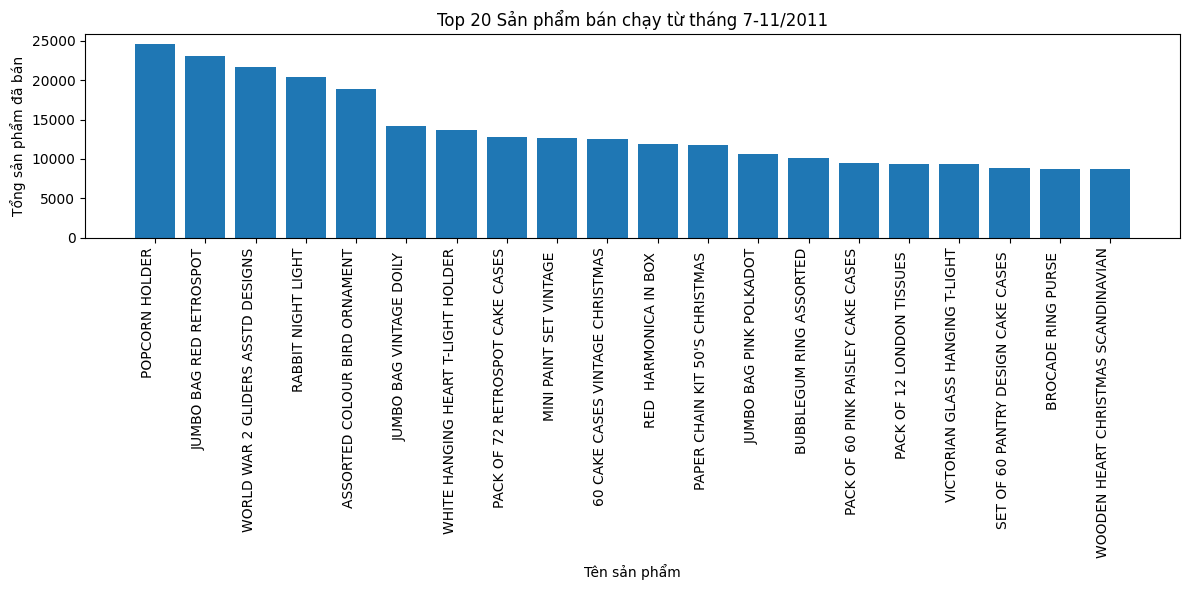

In [185]:
# Tạo biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(top_products['Description'], top_products['quantity_sum'])
plt.ylabel("Tổng sản phẩm đã bán")
plt.xlabel("Tên sản phẩm")
plt.title("Top 20 Sản phẩm bán chạy từ tháng 7-11/2011")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

**Một số nhận xét qua bảng và biểu đồ Top 20 sản phẩm bán chạy nhất:**
1. Sản phẩm bán chạy nhất là "POPCORN HOLDER", với tổng số lượng bán ra gần 25.000 sản phẩm.
2. Có 4 sản phẩm được bán với doanh số lớn hơn 20 nghìn và 14 sản phẩm hơn 10 nghìn. 
3. Những sản phẩm đơn giản, tiện dụng hoặc mang yếu tố trang trí (như đèn ngủ thỏ, giá đỡ bỏng ngô, túi jumbo, đồ treo giáng sinh) có xu hướng bán chạy.
4. Sản phẩm liên quan đến mùa lễ hội (Christmas) cũng chiếm một phần đáng kể trong danh sách.
5. Nhiều sản phẩm có vẻ mang phong cách retro/vintage, có thể cho thấy xu hướng tiêu dùng vào thời điểm đó.

### 2.1.2 Tần suất & giá trị mua hàng trung bình giai đoạn từ tháng 7-11/2011

1. Tần suất mua hàng trung bình của khách hàng = Tổng số giao dịch/Số lượng khách hàng
2. Giá trị trung bình của khách hàng = Tổng số giá trị giao dịch của khách hàng/Số lượng khách hàng
3. Giá trị trung bình đơn hàng = Tổng giá trị đơn hàng/Số lượng đơn hàng

In [186]:
# Tính TotalAmount cho từng dòng (số lượng * đơn giá)
df1['TotalAmount'] = df1['Quantity'] * df1['UnitPrice']

# 1. Giá trị trung bình của một đơn hàng
avg_order_value = ( df1.groupby('InvoiceNo')['TotalAmount'].sum().mean())

# 2. Tần suất mua hàng trung bình của mỗi khách hàng
customer_frequency =  (df1.groupby('CustomerID')['InvoiceNo'].nunique().mean())

# 3. Giá trị trung bình mỗi khách hàng mang lại
avg_customer_value = (df1.groupby('CustomerID')['TotalAmount'].sum().mean())

# 4. Tổng doanh thu toàn bộ dataset
total_revenue = df1['TotalAmount'].sum()

# 5. Tổng số đơn hàng duy nhất
total_orders = df1['InvoiceNo'].nunique()

# Tạo chuỗi kết quả phân tích tổng quan
summary_string = f"""
TẦN SUẤT VÀ GIÁ TRỊ MUA HÀNG TRUNG BÌNH GIAI ĐOẠN T7-T11/2011:

• Giá trị trung bình mỗi đơn hàng: {round(avg_order_value, 2)} GBP/đơn hàng
• Tần suất mua hàng trung bình mỗi khách: {round(customer_frequency, 2)} đơn hàng/khách
• Giá trị trung bình mỗi khách hàng: {round(avg_customer_value, 2)} GBP/khách hàng
• Tổng doanh thu: {round(total_revenue, 2)} GBP
• Tổng số đơn hàng: {total_orders} đơn hàng
"""

print(summary_string)


TẦN SUẤT VÀ GIÁ TRỊ MUA HÀNG TRUNG BÌNH GIAI ĐOẠN T7-T11/2011:

• Giá trị trung bình mỗi đơn hàng: 490.64 GBP/đơn hàng
• Tần suất mua hàng trung bình mỗi khách: 2.71 đơn hàng/khách
• Giá trị trung bình mỗi khách hàng: 1327.92 GBP/khách hàng
• Tổng doanh thu: 4343618.41 GBP
• Tổng số đơn hàng: 8853 đơn hàng



## 2.2 Phân tích chi tiết

### 2.2.1 Phân tích đơn hàng, khách hàng và doanh thu theo tháng 

In [187]:
# Tạo bản sao df1
df2 = df1.copy()

# Tạo cột YearMonth
df2['YearMonth'] = df2['InvoiceDate'].dt.to_period('M')

# Các chỉ số theo đơn hàng
monthly_orders = df2.groupby('YearMonth')['InvoiceNo'].nunique()
monthly_revenue = df2.groupby('YearMonth')['TotalAmount'].sum()
avg_order_value = (monthly_revenue / monthly_orders).round(0)

# Các chỉ số theo khách hàng
monthly_customers = df2.groupby('YearMonth')['CustomerID'].nunique()
avg_orders_per_customer = (monthly_orders / monthly_customers).round(2)
avg_revenue_per_customer = (monthly_revenue / monthly_customers).round(0)

# Gộp lại thành một bảng duy nhất
monthly_summary = pd.DataFrame({
    'Tổng đơn hàng': monthly_orders,
    'Tổng khách hàng': monthly_customers,
    'Tổng doanh thu (GBP)': monthly_revenue.round(0),
    'Giá trị TB mỗi đơn (GBP)': avg_order_value,
    'Số đơn TB mỗi khách': avg_orders_per_customer,
    'Doanh thu TB mỗi khách (GBP)': avg_revenue_per_customer
}).reset_index()

monthly_summary.head()

,YearMonth,Tổng đơn hàng,Tổng khách hàng,Tổng doanh thu (GBP),Giá trị TB mỗi đơn (GBP),Số đơn TB mỗi khách,Doanh thu TB mỗi khách (GBP)
0,2011-07,1331,949,598963.0,450.0,1.40,631.0
1,2011-08,1280,935,644051.0,503.0,1.37,689.0
2,2011-09,1755,1266,950690.0,542.0,1.39,751.0
3,2011-10,1929,1364,1035642.0,537.0,1.41,759.0
4,2011-11,2558,1621,1114272.0,436.0,1.58,687.0


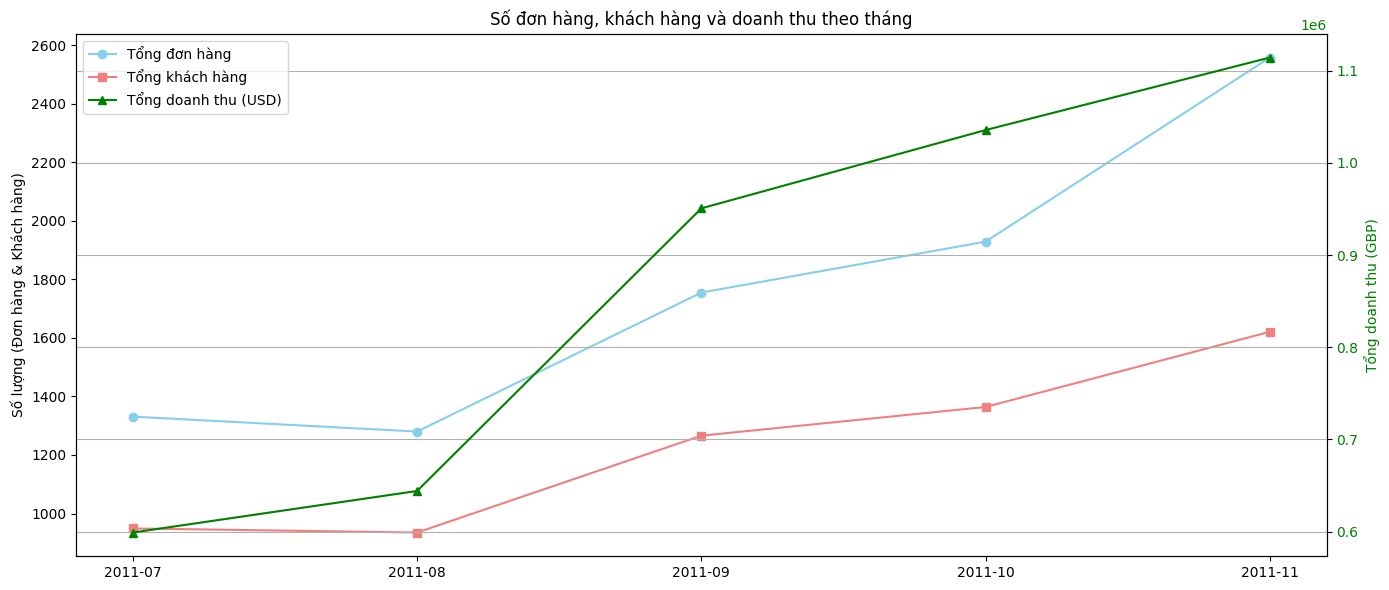

In [188]:
# Biểu đồ số đơn hàng, khách hàng và doanh thu theo tháng
plt.figure(figsize=(14, 6))

# Vẽ số đơn hàng
line1, = plt.plot(monthly_summary['YearMonth'].astype(str), monthly_summary['Tổng đơn hàng'], label='Tổng đơn hàng', marker='o', color='skyblue')

# Vẽ số khách hàng
line2, = plt.plot(monthly_summary['YearMonth'].astype(str), monthly_summary['Tổng khách hàng'], label='Tổng khách hàng', marker='s', color='lightcoral')
plt.ylabel('Số lượng (Đơn hàng & Khách hàng)', color='black')
plt.tick_params(axis='y', labelcolor='black')

# Tạo trục y thứ hai cho doanh thu (bên phải)
ax2 = plt.twinx()
line3, = ax2.plot(monthly_summary['YearMonth'].astype(str), monthly_summary['Tổng doanh thu (GBP)'], label='Tổng doanh thu (USD)', marker='^', color='green')
ax2.set_ylabel('Tổng doanh thu (GBP)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Số đơn hàng, khách hàng và doanh thu theo tháng')
plt.xlabel('Tháng')
plt.xticks(rotation=45)

# Tạo một legend duy nhất cho cả hai trục y
lines = [line1, line2, line3]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

**Một số thông tin thu được:**

*Tương quan giữa số đơn hàng và doanh thu:* Nếu doanh thu tăng khi số đơn hàng tăng, điều này khá trực quan. Tuy nhiên, giai đoạn từ tháng 7 tới tháng 8, doanh thu tăng mà số đơn hàng giảm, điều này có thể chỉ ra sự tăng trưởng doanh thu do khách hàng mua nhiều sản phẩm hơn trong một lần mua hoặc mua các sản phẩm có giá trị cao hơn.

*Tương quan giữa số khách hàng và doanh thu:* Tương tự, giai đoạn từ tháng 7 tới tháng 8 ghi nhận doanh thu tăng mà số lượng khách hàng không đổi hoặc giảm, có thể là do khách hàng hiện tại chi tiêu nhiều hơn.

*Tính thời vụ và các yếu tố bên ngoài:* Chúng ta chỉ có thể đánh giá tác động của số đơn hàng và số khách hàng tới tổng doanh thu trong điều kiện các yếu tố khác không thay đổi. Vậy nên ta sẽ xem xét cụ thể **các sản phẩm bán chạy nhất trong từng tháng** để xem tính mùa vụ.

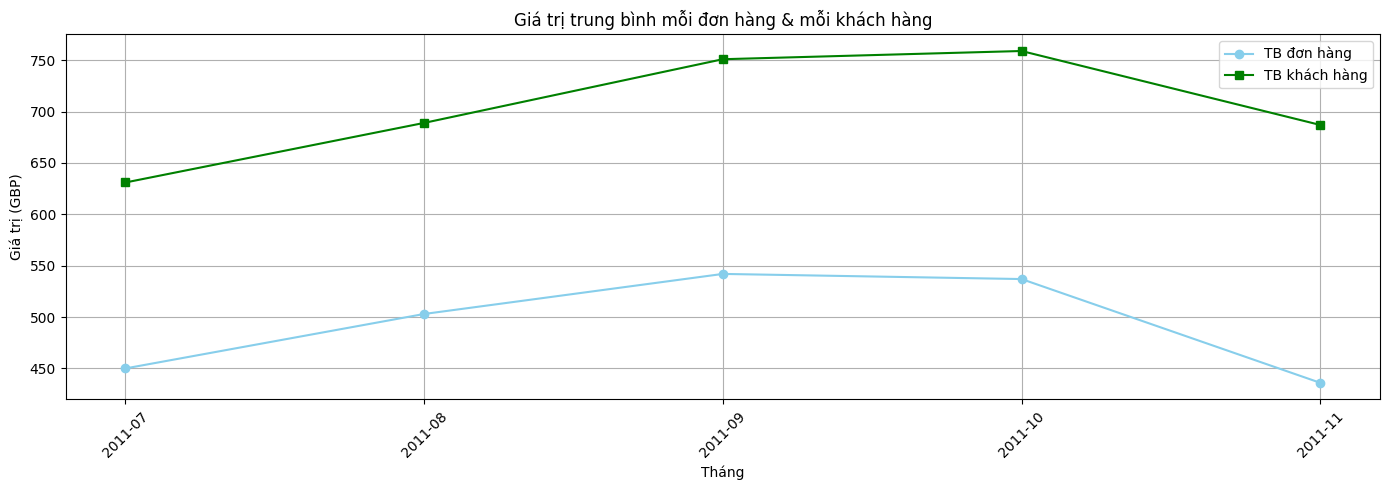

In [204]:
# Biểu đồ giá trị trung bình
plt.figure(figsize=(14, 5))
plt.plot(monthly_summary['YearMonth'].astype(str), monthly_summary['Giá trị TB mỗi đơn (GBP)'], label='TB đơn hàng', marker='o', color='skyblue')
plt.plot(monthly_summary['YearMonth'].astype(str), monthly_summary['Doanh thu TB mỗi khách (GBP)'], label='TB khách hàng', marker='s', color='green')
plt.title('Giá trị trung bình mỗi đơn hàng & mỗi khách hàng')
plt.xlabel('Tháng')
plt.ylabel('Giá trị (GBP)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Nhận xét về mối quan hệ giữa hai đường:**

Khoảng cách giá trị “mỗi khách” so với “mỗi đơn” duy trì tương đối ổn định (khoảng 180–220 GBP), cho thấy mô hình tương tác khách với đơn hàng không thay đổi đột biến: khách vẫn duy trì tần suất/giá trị mua so với quy mô đơn hàng.

Cả hai chỉ số cùng tăng từ tháng 7 → 9, rồi giảm ở tháng 11, và độ dốc (tốc độ lên/xuống) của chúng tương tự nhau. Điều này cho thấy mức độ biến động giá trị doanh thu đều đi theo một mô hình duy nhất.

Để phân tích lý do của sự thay đổi trong từng tháng, chúng em sẽ tiến hành **phân tích các sản phẩm bán chạy trong từng tháng**.

### 2.2.2 Phân tích các sản phẩm bán chạy nhất trong tháng

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1564\1566963497.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Description', y=measure, data=product_sales, palette='viridis')


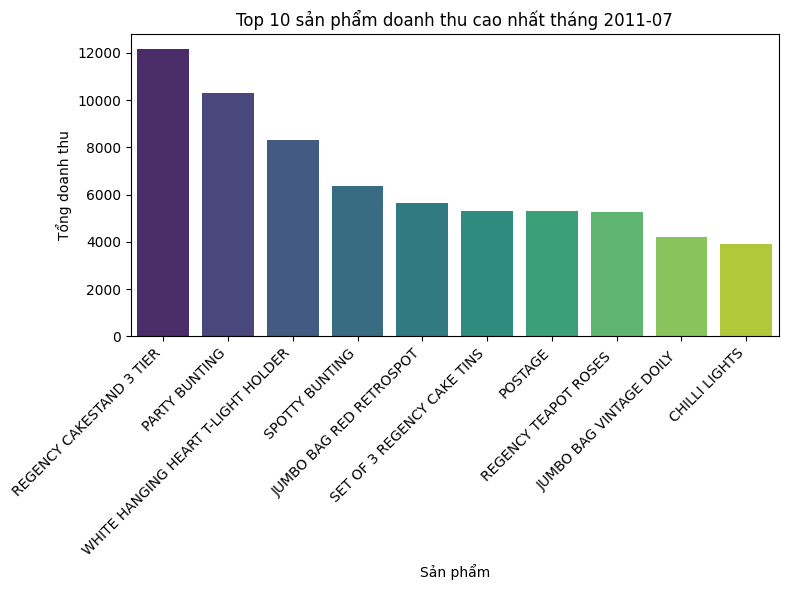

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1564\1566963497.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Description', y=measure, data=product_sales, palette='viridis')


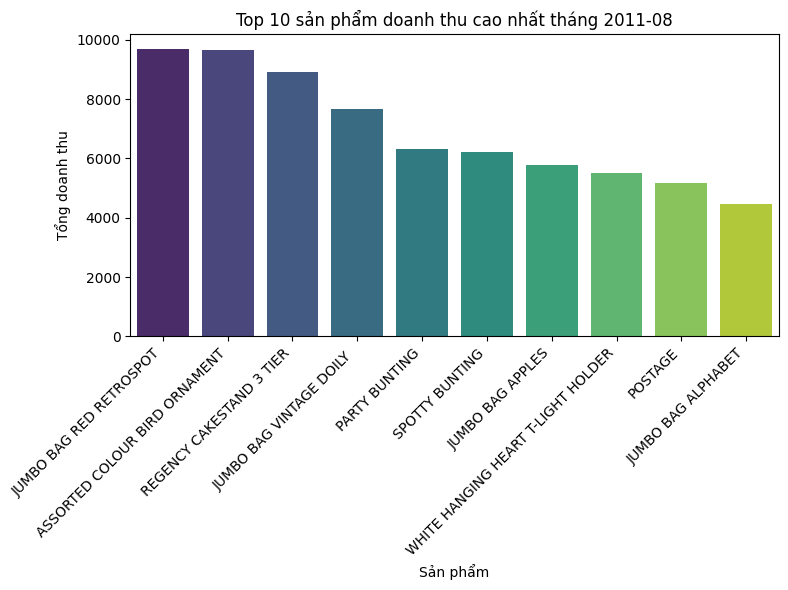

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1564\1566963497.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Description', y=measure, data=product_sales, palette='viridis')


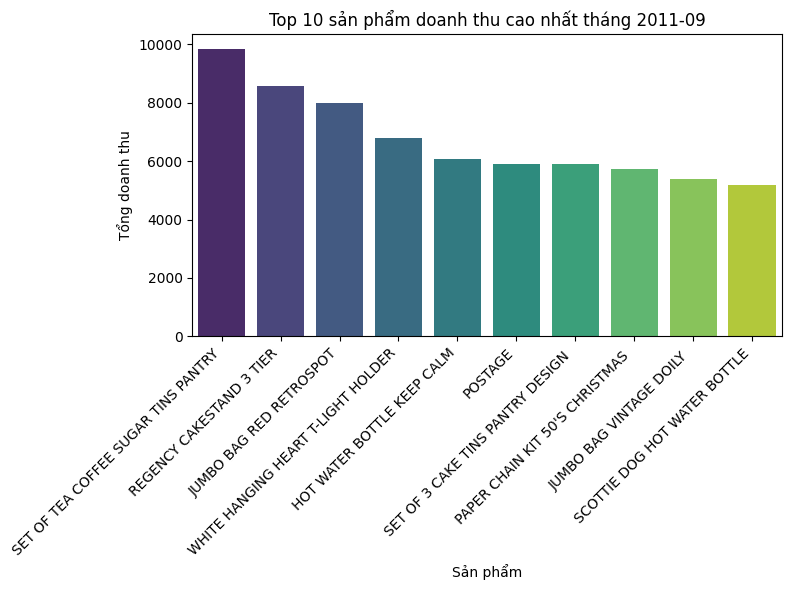

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1564\1566963497.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Description', y=measure, data=product_sales, palette='viridis')


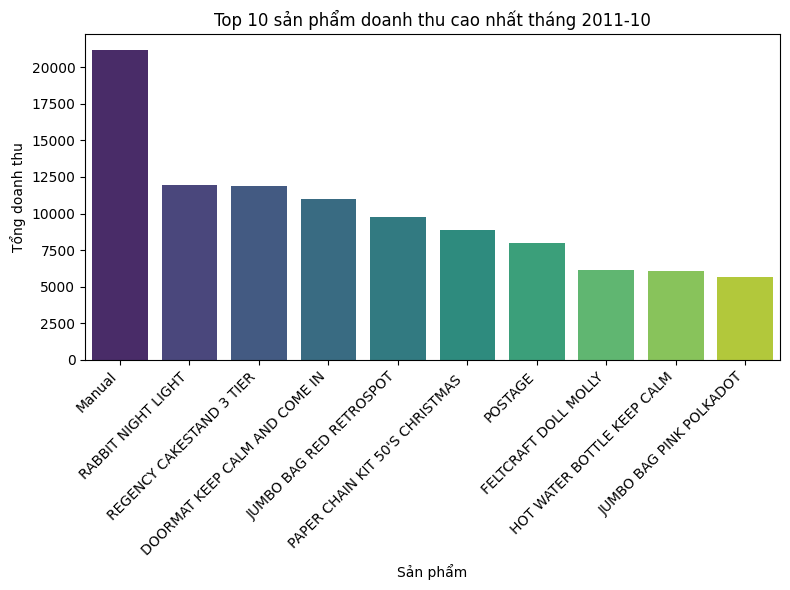

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1564\1566963497.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Description', y=measure, data=product_sales, palette='viridis')


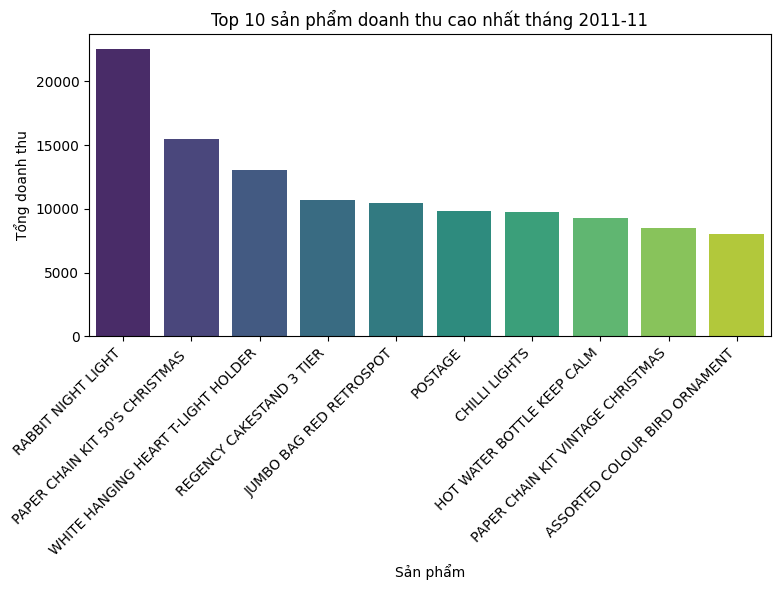

In [189]:
def plot_top_n_monthly(df, year_month, n=10, measure='Quantity'):
    """
    Vẽ biểu đồ top N sản phẩm bán chạy nhất (hoặc doanh thu cao nhất) cho một tháng cụ thể.

    Args:
        df (pd.DataFrame): DataFrame chứa dữ liệu bán hàng.
        year_month (str hoặc pd.Period): Tháng cần phân tích (ví dụ: '2011-12' hoặc pd.Period('2011-12')).
        n (int): Số lượng sản phẩm top cần hiển thị.
        measure (str): 'Quantity' để xem bán chạy nhất theo số lượng, 'TotalAmount' để xem doanh thu cao nhất.
    """
    month_data = df[df['YearMonth'] == pd.Period(year_month)]

    if measure == 'Quantity':
        product_sales = month_data.groupby('Description')['Quantity'].sum().nlargest(n).reset_index()
        title = f'Top {n} sản phẩm bán chạy nhất tháng {year_month}'
        y_label = 'Số lượng bán'
    elif measure == 'TotalAmount':
        product_revenue = month_data.groupby('Description')['TotalAmount'].sum().nlargest(n).reset_index()
        title = f'Top {n} sản phẩm doanh thu cao nhất tháng {year_month}'
        y_label = 'Tổng doanh thu'
        product_sales = product_revenue
    else:
        print("Giá trị 'measure' không hợp lệ. Vui lòng chọn 'Quantity' hoặc 'TotalAmount'.")
        return

    if not product_sales.empty:
        plt.figure(figsize=(8, 6))
        sns.barplot(x='Description', y=measure, data=product_sales, palette='viridis')
        plt.title(title)
        plt.xlabel('Sản phẩm')
        plt.ylabel(y_label)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Không có dữ liệu cho tháng {year_month}.")

# Vẽ 5 sản phẩm bán chạy nhất các tháng năm 2011 theo doanh thu 
plot_top_n_monthly(df2, '2011-07', n=10, measure='TotalAmount')
plot_top_n_monthly(df2, '2011-08', n=10, measure='TotalAmount')
plot_top_n_monthly(df2, '2011-09', n=10, measure='TotalAmount')
plot_top_n_monthly(df2, '2011-10', n=10, measure='TotalAmount')
plot_top_n_monthly(df2, '2011-11', n=10, measure='TotalAmount')

**Một số điều nhóm quan sát được:**

*Tháng 7 - 8 - 9:* 
1. Các sản phẩm bán chạy nhất trong các tháng này thu về khoảng 10 nghìn GBP.
2. Một số sản phẩm liên tục xuất hiện trong Top 10 như "REGENCY CAKESTAND 3 TIER", "JUMBO BAG RED RETROSPOT", "WHITE HANGING HEART T-LIGHT đều là các mặt hàng trang trí nhà cửa (cake stand, bunting, light holder...) và đồ gia dụng dễ thương (jumbo bag, tins, hot water bottle).

*Tháng 10 - 11:*
1. Các sản phẩm bán chạy nhất tháng đã vượt ngưỡng 20 nghìn GBP.
2. Một số sản phẩm mới xuất hiện so với ba tháng trước liên quan đến những ngày lễ đặc biệt (Christmas).

### 2.2.3 Phân tích số khách hàng mua lại hàng tháng 

Số khách hàng mua lại hàng tháng được hiểu là số lượng khách hàng đã từng mua hàng ở tháng liền kề trước đó và quay lại vào tháng sau.

Ví dụ: Một người mua hàng vào tháng 7 và tháng 8 thì được coi là một khách hàng quay lại vào tháng 8. Một người mua hàng vào tháng 7 và tháng 9 sẽ KHÔNG được coi là một khách hàng quay lại vào tháng 9. 

Phân tích khách hàng mua lại hàng tháng:
           Khách hàng mua lại  Tổng doanh thu  \
YearMonth                                       
2011-07                   0.0      598962.901   
2011-08                 388.0      644051.040   
2011-09                 425.0      950690.202   
2011-10                 489.0     1035642.450   
2011-11                 601.0     1114271.820   

           Doanh thu từ khách hàng mua lại  \
YearMonth                                    
2011-07                               0.00   
2011-08                           18467.82   
2011-09                           21384.11   
2011-10                           30737.28   
2011-11                           33638.25   

           Tỷ lệ doanh thu từ khách hàng mua lại (%)  
YearMonth                                             
2011-07                                     0.000000  
2011-08                                     2.867447  
2011-09                                     2.249325  
2011-10          

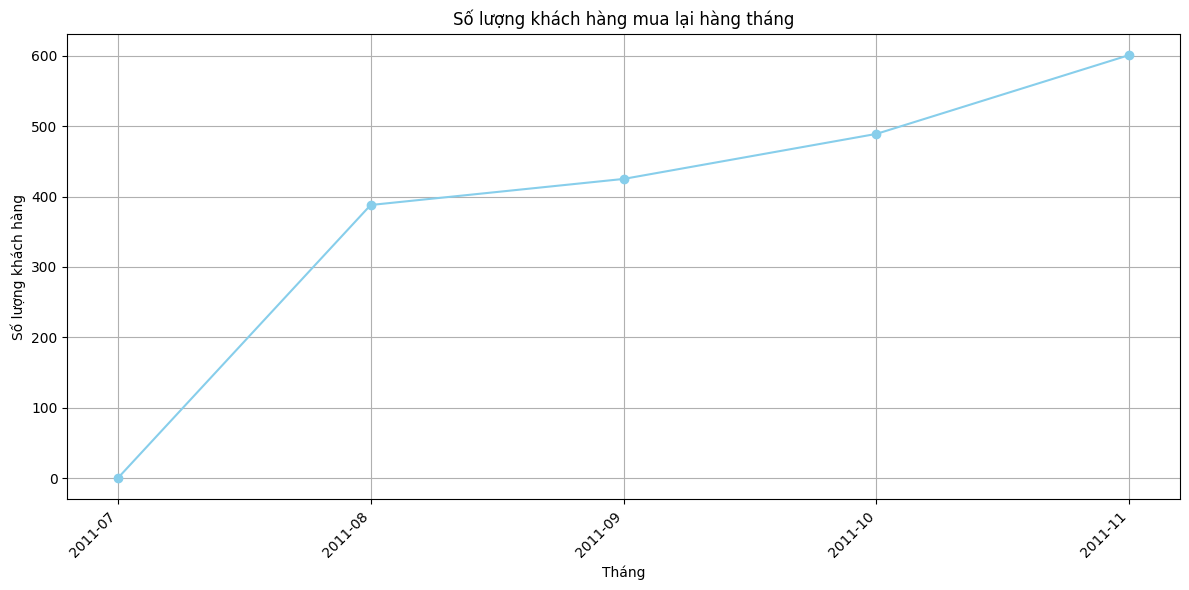

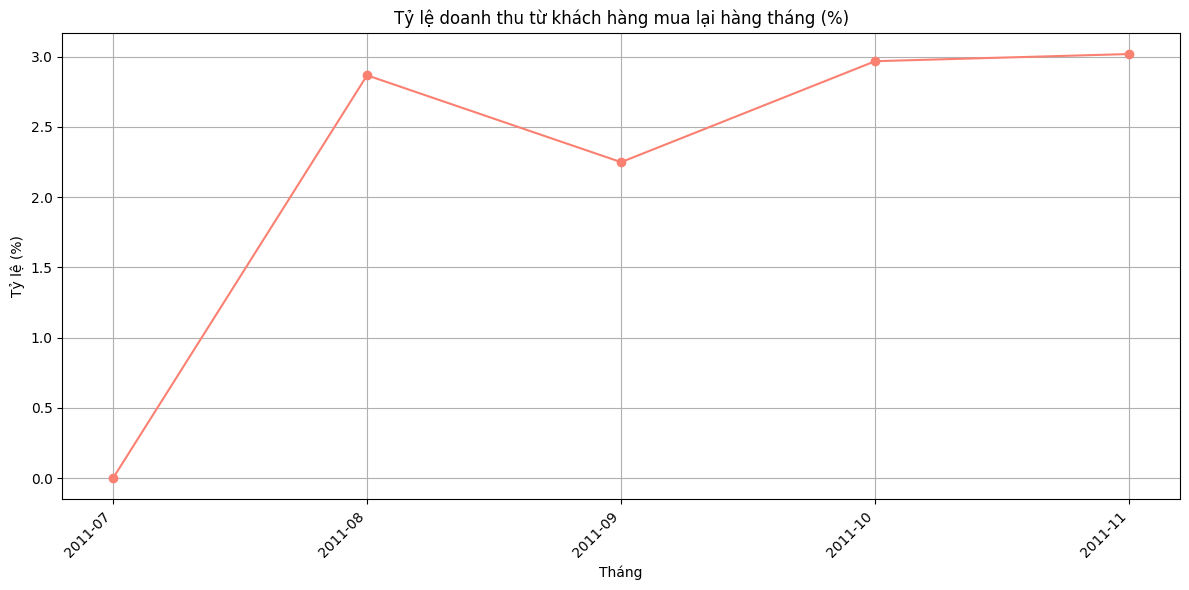

In [202]:
# Tạo cột 'YearMonth' để phân tích theo tháng
df2['YearMonth'] = df2['InvoiceDate'].dt.to_period('M')

# Sắp xếp DataFrame theo CustomerID và InvoiceDate
df2 = df2.sort_values(by=['CustomerID', 'InvoiceDate'])

# Tạo cột đánh dấu tháng mua hàng liền trước của mỗi khách hàng
df2['Tháng Mua Trước'] = df2.groupby('CustomerID')['YearMonth'].shift(1)

# Kiểm tra giá trị NaT và thay thế bằng một giá trị hợp lý (ví dụ: NaT = 'M1' hoặc bỏ qua)
df2['KhoangCachThang'] = (df2['YearMonth'] - df2['Tháng Mua Trước']).apply(
    lambda x: x.n if pd.notna(x) else 0  # Kiểm tra NaT và thay thế với 0 nếu là NaT
)

# Lọc chỉ lấy khách hàng mua lại đúng một tháng sau
mask = df2['KhoangCachThang'] == 1
df_repeat = df2[mask]

# Xác định số lượng khách hàng mua lại trong từng tháng
khach_hang_mua_lai_hang_thang_df = df_repeat.groupby('YearMonth')['CustomerID'].nunique().reset_index()
khach_hang_mua_lai_hang_thang_df.rename(columns={'CustomerID': 'Khách hàng mua lại'}, inplace=True)
khach_hang_mua_lai_hang_thang = khach_hang_mua_lai_hang_thang_df.set_index('YearMonth')['Khách hàng mua lại']

# Tính tổng doanh thu hàng tháng
tong_doanh_thu_hang_thang = df2.groupby('YearMonth')['TotalAmount'].sum()

# Tính tổng doanh thu từ khách hàng mua lại hàng tháng (mua trong tháng hiện tại và tháng trước)
doanh_thu_khach_hang_mua_lai_hang_thang = df_repeat.groupby('YearMonth')['TotalAmount'].sum()

# Tính tỷ lệ doanh thu từ khách hàng mua lại
ty_le_doanh_thu_khach_hang_mua_lai = (doanh_thu_khach_hang_mua_lai_hang_thang / tong_doanh_thu_hang_thang) * 100

# Tạo DataFrame tổng hợp
phan_tich_khach_hang_mua_lai = pd.DataFrame({
    'Khách hàng mua lại': khach_hang_mua_lai_hang_thang,
    'Tổng doanh thu': tong_doanh_thu_hang_thang,
    'Doanh thu từ khách hàng mua lại': doanh_thu_khach_hang_mua_lai_hang_thang,
    'Tỷ lệ doanh thu từ khách hàng mua lại (%)': ty_le_doanh_thu_khach_hang_mua_lai
}).fillna(0)

print("Phân tích khách hàng mua lại hàng tháng:")
print(phan_tich_khach_hang_mua_lai)

# Vẽ biểu đồ số lượng khách hàng mua lại hàng tháng
plt.figure(figsize=(12, 6))
plt.plot(phan_tich_khach_hang_mua_lai.index.astype(str), phan_tich_khach_hang_mua_lai['Khách hàng mua lại'], marker='o', color='skyblue')
plt.title('Số lượng khách hàng mua lại hàng tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lượng khách hàng')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Vẽ biểu đồ tỷ lệ doanh thu từ khách hàng mua lại hàng tháng
plt.figure(figsize=(12, 6))
plt.plot(phan_tich_khach_hang_mua_lai.index.astype(str), phan_tich_khach_hang_mua_lai['Tỷ lệ doanh thu từ khách hàng mua lại (%)'], marker='o', color='salmon')
plt.title('Tỷ lệ doanh thu từ khách hàng mua lại hàng tháng (%)')
plt.xlabel('Tháng')
plt.ylabel('Tỷ lệ (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

**Nhận xét:**
1. Vì nhóm không sử dụng dữ liệu của tháng 6 nên tháng 7 không ghi nhận khách hàng mua lại.
2. Số khách quay lại tăng dần từ tháng 8 đến tháng 11, tuy nhiên tỷ lệ đóng góp vào doanh thu lại giảm vào tháng 9. Lý do có thể là vì họ mua ít hơn hoặc mua những sản phẩm rẻ hơn so với trước, hay có thể do có nhiều khách mới và họ chi tiêu mạnh (ví dụ do dịp lễ, chương trình khuyến mãi).

# **3. Xây dựng Hệ thống gợi ý (USER-BASED FILTERING)**

In [191]:
# Tạo bảng thông tin về stockcode, description (Chứa thông tin stock_description)
stock_description_table = df1[['StockCode', 'Description']].copy()

stock_description_table.head()

,StockCode,Description
245903,84836,ZINC METAL HEART DECORATION
245904,71459,HANGING JAM JAR T-LIGHT HOLDERS
245905,22784,LANTERN CREAM GAZEBO
245906,23145,ZINC T-LIGHT HOLDER STAR LARGE
245907,22674,FRENCH TOILET SIGN BLUE METAL


In [192]:
## Tạo bảng ma trận giữa số lượng mua của mỗi sản phẩm theo khách hàng

# Tạo bảng Customer, stockcode, tổng quantity
df_agg = df1.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().reset_index()

# Tạo bảng pivot table với customerId, StockCode
pivot_table = df_agg.pivot(index='CustomerID', columns='StockCode', values='Quantity').fillna(0)
pivot_table

StockCode,10080,10120,10124A,10124G,10125,10133,10135,11001,15030,15034,...,90214L,90214M,90214N,90214S,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
12356.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18277.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18278.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
## Xác định sự tương đồng giữa các người dùng
# Cài đặt hàm nghiên cứu độ tương đồng giữa 2 khách hàng
from sklearn.metrics.pairwise import cosine_similarity

# Tạo table (ma trận tương đồng giữa người dùng)
similarity_user = pd.DataFrame(
    cosine_similarity(pivot_table),
    index= pivot_table.index,
    columns= pivot_table.index
)
similarity_user.head()

CustomerID,12347.0,12348.0,12349.0,12352.0,12356.0,12357.0,12358.0,12359.0,12360.0,12362.0,...,18270.0,18272.0,18273.0,18274.0,18276.0,18277.0,18278.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,1.000000,0.000000,0.021480,0.018758,0.030490,0.020937,0.000000,0.089429,0.002378,0.095512,...,0.0,0.015968,0.0,0.001743,0.130978,0.0,0.020149,0.000000,0.134964,0.000000
12348.0,0.000000,1.000000,0.000069,0.000617,0.000000,0.000000,0.000397,0.000000,0.000352,0.000930,...,0.0,0.000000,0.0,0.000000,0.258424,0.0,0.000000,0.000000,0.180323,0.151088
12349.0,0.021480,0.000069,1.000000,0.038646,0.005858,0.103707,0.189028,0.058146,0.045810,0.098037,...,0.0,0.110937,0.0,0.148066,0.000000,0.0,0.015680,0.013543,0.065477,0.000000
12352.0,0.018758,0.000617,0.038646,1.000000,0.021033,0.046353,0.005791,0.019465,0.006973,0.045823,...,0.0,0.171016,0.0,0.040892,0.000000,0.0,0.000000,0.000000,0.001347,0.000000
12356.0,0.030490,0.000000,0.005858,0.021033,1.000000,0.031325,0.000000,0.092541,0.000000,0.003446,...,0.0,0.000000,0.0,0.017594,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [194]:
## Nghiên cứu một khách hàng cụ thể

# Chọn khách hàng có customerID 12347
CustomerID = 12347

# Lấy top 5 khách hàng giống nhất
similar_users = similarity_user.loc[CustomerID].sort_values(ascending=False).iloc[1:6].index

# Lấy trung bình số lượng mua các sản phẩm từ các khách này
similar_products = pivot_table.loc[similar_users].mean()

# Loại bỏ sản phẩm khách hàng này đã mua
products_owned = pivot_table.loc[CustomerID] #Lấy thông tin sản phẩm của khách hàng
recommendations = similar_products[products_owned == 0].sort_values(ascending=False).head(5) #Chọn ra những sản phẩm KH chưa mua, sort theo thứ tự từ cao xuống

# Map StockCode với Description
stock_description_table_unique = stock_description_table.drop_duplicates(subset=['StockCode']) #remove trùng lặp với bảng stock_description
recommendations_with_desc = recommendations.index.map( stock_description_table_unique.set_index('StockCode')['Description'])

# In kết quả
print("Top 5 sản phẩm gợi ý cho khách hàng", CustomerID)
for i, stock_code in enumerate(recommendations.index, 1):
    description = stock_description_table_unique.set_index('StockCode').loc[stock_code]['Description']
    print(f"{i}. {stock_code} - {description}")

Top 5 sản phẩm gợi ý cho khách hàng 12347
1. 21915 - RED  HARMONICA IN BOX 
2. 23293 - SET OF 12 FAIRY CAKE BAKING CASES
3. 23295 - SET OF 12 MINI LOAF BAKING CASES
4. 23296 - SET OF 6 TEA TIME BAKING CASES
5. 22544 - MINI JIGSAW SPACEBOY


# **4. Trực quan hóa**

## 4.1 Gợi ý top 5 sản phẩm cho khách hàng

In [195]:
# Tạo hàm nhập dữ liệu CustomerID
def recommend_items(CustomerID, n_recommendations=5):
# Kiểm tra dữ liệu có ở trong bảng dữ liệu không
    if CustomerID not in pivot_table.index:
        print(f"User ID {CustomerID} Không tìm thấy.")
        return

    #Lấy top 5 khách hàng giống nhất
    similar_users = similarity_user.loc[CustomerID].sort_values(ascending=False).iloc[1:6].index

    # Lấy trung bình số lượng mua các sản phẩm từ các khách này
    similar_products = pivot_table.loc[similar_users].mean()

    #Loại bỏ sản phẩm khách hàng này đã mua
    products_owned = pivot_table.loc[CustomerID] # Chuyển pivot_user sang pivot_table
    recommendations = similar_products[products_owned == 0].sort_values(ascending=False).head(n_recommendations)

    # Map StockCode với Description
    stock_description_table_unique = stock_description_table.drop_duplicates(subset=['StockCode'])
    stock_desc_map = stock_description_table_unique.set_index('StockCode')['Description']

    # Trả về danh sách (StockCode, Description)
    recommendations_with_detail = [
        (code, stock_desc_map.get(code, "Không có mô tả"))
        for code in recommendations.index
    ]
    
    return recommendations_with_detail
# Nhập CustomerID từ người dùng
CustomerID = int(input("Nhập CustomerID: "))
recommendations = recommend_items(CustomerID)

# In kết quả
if recommendations is not None:
    print(f"Top {len(recommendations)} sản phẩm gợi ý cho khách hàng {CustomerID}:")
    for i, (code, desc) in enumerate(recommendations, 1):
        print(f"{i}. {code} - {desc}")


Top 5 sản phẩm gợi ý cho khách hàng 12347:
1. 21915 - RED  HARMONICA IN BOX 
2. 23293 - SET OF 12 FAIRY CAKE BAKING CASES
3. 23295 - SET OF 12 MINI LOAF BAKING CASES
4. 23296 - SET OF 6 TEA TIME BAKING CASES
5. 22544 - MINI JIGSAW SPACEBOY


**GỢI Ý CHIẾN LƯỢC MARKETING:**
1.  Gợi ý cá nhân hóa trên web/app

Khi khách đang xem sản phẩm, hiện “Bạn có thể thích những sản phẩm này”

2.  Email marketing riêng biệt

Gửi email định kỳ cho khách hàng, trong đó giới thiệu 5 sản phẩm phù hợp nhất dựa trên hành vi mua hàng của những khách hàng tương tự.


## 4.2 Biểu đồ mạng các sản phẩm thường mua kèm



In [196]:
# Cài các thư viện cần thiết tạo và phân tích biểu đồ mạng
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder #phân tích giỏ hàng
import networkx as nx

In [197]:
# Nhóm theo Invoice (giỏ hàng)
basket_data = df1.groupby(['InvoiceNo'])['Description'].apply(list)

# Chuyển sang dạng nhị phân (1-0)
te = TransactionEncoder()
te_ary = te.fit(basket_data).transform(basket_data)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.head()

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,...,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [198]:
# Tìm các sản phẩm thường mua kèm (min_support=0.02 - chỉ lấy những nhóm sp xuất hiện ít nhất 2% trong các đơn)
frequent_items = apriori(df_encoded, min_support=0.02, use_colnames=True)

# Tìm luật kết hợp
rules = association_rules(frequent_items, metric="lift", min_threshold=1) #lift >=1 thể hiện việc sp cần mua kèm nhau
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.036824,0.051508,0.023495,0.638037,12.387149,1.0,0.021598,2.620410,0.954416,0.362369,0.618380,0.547089
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.051508,0.036824,0.023495,0.456140,12.387149,1.0,0.021598,1.771002,0.969192,0.362369,0.435348,0.547089
2,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.047667,0.051508,0.034000,0.713270,13.847764,1.0,0.031545,3.307964,0.974225,0.521664,0.697699,0.686679
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.051508,0.047667,0.034000,0.660088,13.847764,1.0,0.031545,2.801701,0.978170,0.521664,0.643074,0.686679
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.036824,0.047667,0.023495,0.638037,13.385166,1.0,0.021740,2.631020,0.960666,0.385185,0.619919,0.565464


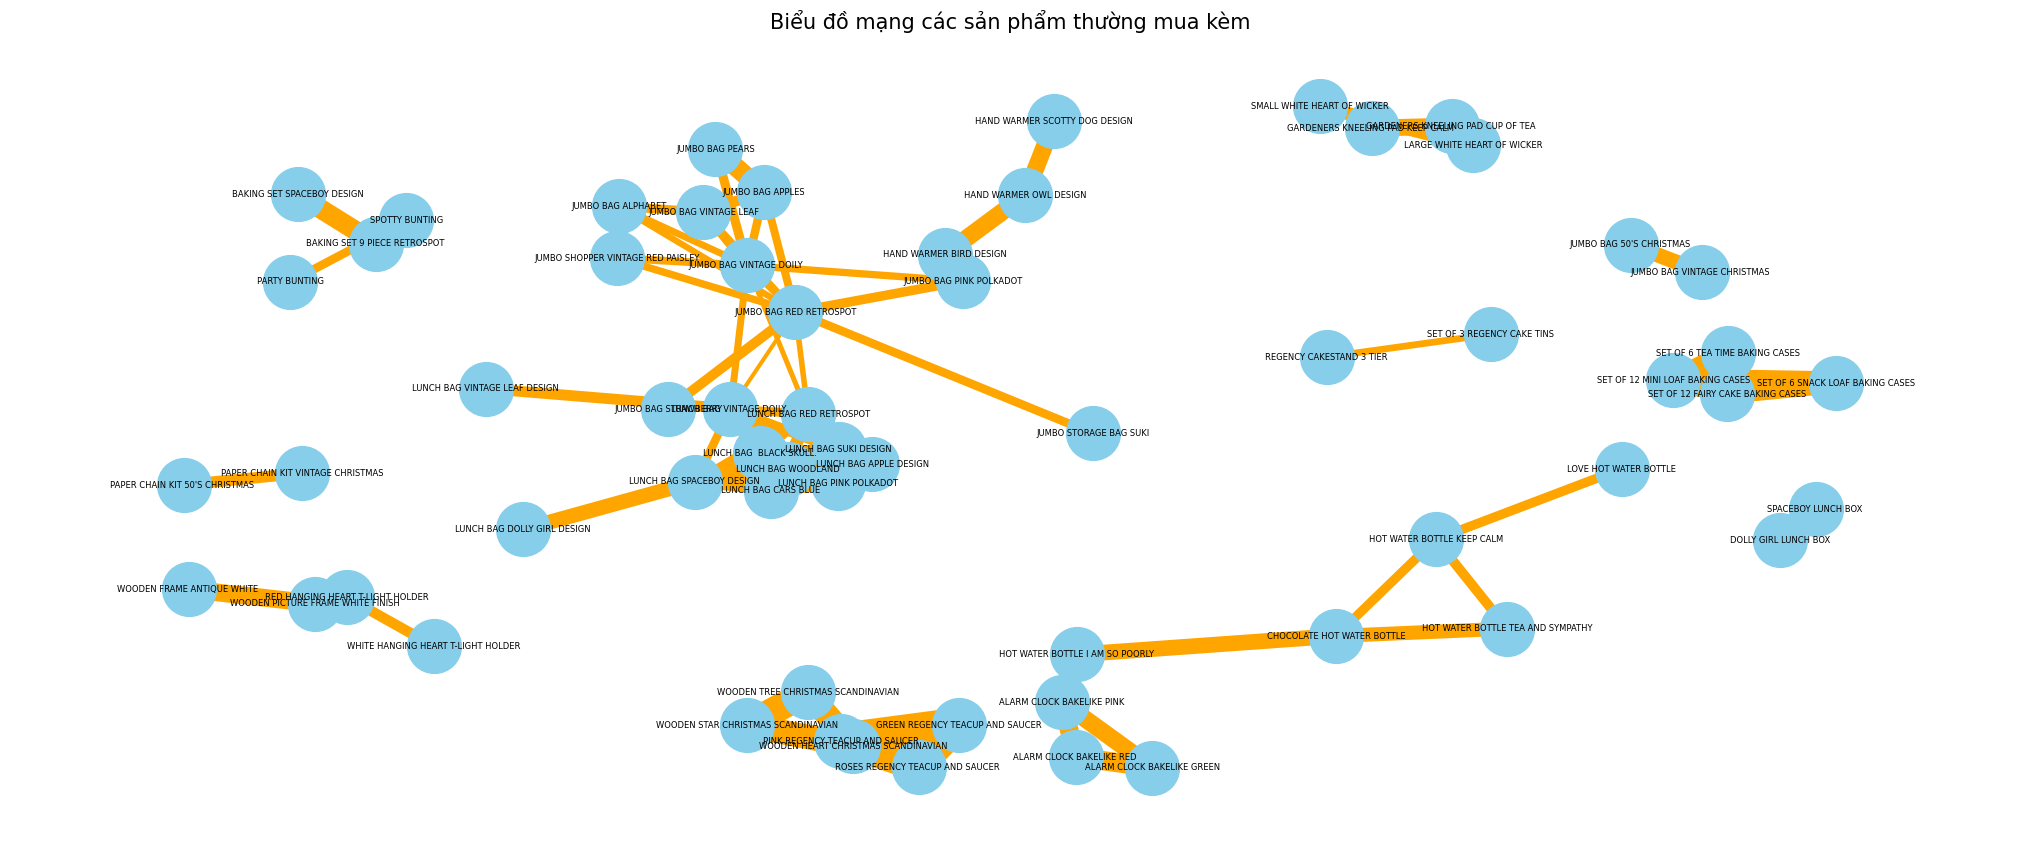

In [199]:
# Tạo biểu đồ
network = nx.Graph()
for index, row in rules.iterrows():
    network.add_edge(', '.join(list(row['antecedents'])),
                 ', '.join(list(row['consequents'])),
                 weight=row['lift'])

# Minh họa biểu đồ
plt.figure(figsize=(20, 8))
pos = nx.spring_layout(network, k=0.75)
edges = network.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

nx.draw(network, pos, with_labels=True, node_color='skyblue',
        node_size=1500, font_size=6, width=weights, edge_color='orange')
plt.title("Biểu đồ mạng các sản phẩm thường mua kèm", fontsize=15)
plt.show()

In [200]:
# Lọc các quy tắc với sản phẩm chính và các sản phẩm gợi ý
rules_sorted = rules.sort_values(by='lift', ascending=False)

# Tạo dictionary để lưu các sản phẩm gợi ý cho mỗi sản phẩm
suggestions = {}

for index, row in rules_sorted.iterrows():
    base_item = row['antecedents']
    consequent_item = row['consequents']
    lift_value = row['lift']
    
    # Chỉ lưu các sản phẩm có lift > 1 và lưu 5 sản phẩm gợi ý mua kèm
    if base_item not in suggestions:
        suggestions[base_item] = []
    
    if len(suggestions[base_item]) < 5:
        suggestions[base_item].append((list(consequent_item)[0], lift_value))

# Tạo bảng kết quả
suggestion_table = []

for product, top_suggestions in suggestions.items():
    row = [list(product)[0]]  # Tên sản phẩm chính
    for suggestion in top_suggestions:
        row.append(suggestion[0])  # Sản phẩm gợi ý
    suggestion_table.append(row)

# Chuyển đổi sang DataFrame
df_suggestions = pd.DataFrame(suggestion_table, columns=['Product'] + [f'Suggested Product {i+1}' for i in range(5)])

# Hiển thị bảng kết quả
df_suggestions

,Product,Suggested Product 1,Suggested Product 2,Suggested Product 3,Suggested Product 4,Suggested Product 5
0,PINK REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,None,None,None
1,GREEN REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,None,None,None
2,ROSES REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,None,None,None
3,WOODEN TREE CHRISTMAS SCANDINAVIAN,WOODEN STAR CHRISTMAS SCANDINAVIAN,WOODEN HEART CHRISTMAS SCANDINAVIAN,None,None,None
4,WOODEN STAR CHRISTMAS SCANDINAVIAN,WOODEN TREE CHRISTMAS SCANDINAVIAN,WOODEN HEART CHRISTMAS SCANDINAVIAN,None,None,None
...,...,...,...,...,...,...
57,PARTY BUNTING,SPOTTY BUNTING,None,None,None,None
58,JUMBO STORAGE BAG SUKI,JUMBO BAG RED RETROSPOT,None,None,None,None
59,JUMBO SHOPPER VINTAGE RED PAISLEY,JUMBO BAG VINTAGE DOILY,JUMBO BAG RED RETROSPOT,None,None,None
60,REGENCY CAKESTAND 3 TIER,SET OF 3 REGENCY CAKE TINS,None,None,None,None


In [201]:
def suggest_products(stockcode, df1, rules, top_n=5):
    # Lấy Description từ stockcode trong df1
    description = df1[df1['StockCode'] == stockcode]['Description'].values
    if not description.any():
        print(f"Không tìm thấy sản phẩm với stockcode {stockcode}.")
        return []

    description = description[0]  # Lấy description đầu tiên nếu có nhiều kết quả

    # Tìm các quy tắc kết hợp có chứa description trong antecedents hoặc consequents
    related_rules = rules[
        (rules['antecedents'].apply(lambda x: description in x)) |
        (rules['consequents'].apply(lambda x: description in x))
    ]

    # Nếu không có quy tắc nào liên quan đến description
    if related_rules.empty:
        print(f"Không có sản phẩm gợi ý mua kèm cho {description}.")
        return []

    suggestions = []
    suggested_products = set()  # Dùng set để loại bỏ trùng lặp

    # Duyệt qua các quy tắc liên quan và lấy sản phẩm gợi ý
    for _, row in related_rules.iterrows():
        if description in row['antecedents']:
            suggestion_product = list(row['consequents'])[0]
            lift_value = row['lift']
            if suggestion_product not in suggested_products:
                suggestions.append((suggestion_product, lift_value))
                suggested_products.add(suggestion_product)
        elif description in row['consequents']:
            suggestion_product = list(row['antecedents'])[0]
            lift_value = row['lift']
            if suggestion_product not in suggested_products:
                suggestions.append((suggestion_product, lift_value))
                suggested_products.add(suggestion_product)

    # Sắp xếp các sản phẩm gợi ý theo giá trị lift và lấy top_n sản phẩm
    suggestions_sorted = sorted(suggestions, key=lambda x: x[1], reverse=True)[:top_n]

    # Trả về kết quả với stockcode và description
    recommendations = []
    for product, lift in suggestions_sorted:
        stockcode_recommendation = df1[df1['Description'] == product]['StockCode'].values[0]
        recommendations.append((stockcode_recommendation, product))
    
    return recommendations, description

# Nhập stockcode từ người dùng
stockcode_input = input("Nhập StockCode sản phẩm: ")

# Lấy kết quả gợi ý từ hàm suggest_products
recommendations, input_description = suggest_products(stockcode_input, df1, rules)

# In kết quả gợi ý với description của stockcode nhập vào
if recommendations:
    print(f"Top {len(recommendations)} sản phẩm gợi ý cho {stockcode_input} ({input_description}):")
    for i, (stockcode, description) in enumerate(recommendations, 1):
        print(f"{i}. StockCode: {stockcode} - Description: {description}")


Top 2 sản phẩm gợi ý cho 23296 (SET OF 6 TEA TIME BAKING CASES):
1. StockCode: 23295 - Description: SET OF 12 MINI LOAF BAKING CASES
2. StockCode: 23293 - Description: SET OF 12 FAIRY CAKE BAKING CASES


**GỢI Ý CHIẾN LƯỢC MARKETING:**
1.  Trưng bày sản phẩm cạnh nhau

Đặt các sản phẩm thường được mua cùng nhau gần nhau trong cửa hàng và trên website, giúp khách dễ nhận ra và chọn mua.

2.   Chương trình combo giảm giá

Tạo các gói sản phẩm thường được mua cùng nhau, kèm ưu đãi giảm giá để khuyến khích khách hàng mua thêm.

3.   Thiết kế quảng cáo theo cặp sản phẩm

Gửi quảng cáo dạng “Khách hàng mua X cũng mua Y”.

4. Gợi ý sản phẩm trên trang thương mại điện tử

Khi khách hàng tìm têm của một sản phẩm, gợi ý tên của các sản phẩm thường được bán kèm theo.